In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Loading arrays from files

## Loading embedding arrays
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/X_spectral_embeddings.csv') as file_name:
    X_embedding = np.loadtxt(file_name, delimiter=",")
print(X_embedding.shape)

In [3]:
## Loading class labels
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_cf_class_labels.csv') as file_name:
    csv_label = csv.reader(file_name)
    label_list = []
    for row in csv_label:
        label_list.append(row[0])
print(len(label_list))

16360


## Count the distribution of class labels

In [4]:
label_distri = {i: label_list.count(i) for i in label_list}

In [5]:
len(label_distri) # give the number of labels in total

278

In [7]:
label_distri

{'Peptidomimetics': 489,
 'Indoles and derivatives': 376,
 'Macrolactams': 49,
 'Fatty Acyls': 566,
 'Carboxylic acids and derivatives': 1583,
 'Benzene and substituted derivatives': 1355,
 'Prenol lipids': 1836,
 'Diazines': 70,
 'Indenes and isoindenes': 5,
 'Oxanes': 9,
 'Organooxygen compounds': 910,
 'Unclassified': 1165,
 'Quinolines and derivatives': 222,
 'Naphthacenes': 4,
 'Macrolides and analogues': 90,
 'Phenols': 134,
 'Imidothioesters': 1,
 'Isoquinolines and derivatives': 54,
 'Furopyrans': 12,
 'Pyridines and derivatives': 161,
 'Pyranodioxins': 3,
 'Azolidines': 19,
 'Oxepanes': 18,
 'Glycerophospholipids': 308,
 'Polypeptides': 52,
 'Pyrroles': 9,
 'Pyrans': 48,
 'Diazanaphthalenes': 105,
 'Tetrapyrroles and derivatives': 23,
 'Organonitrogen compounds': 180,
 'Sphingolipids': 62,
 'Flavonoids': 780,
 'Naphthopyrans': 60,
 'Erythrina alkaloids': 7,
 'Cinnamaldehydes': 6,
 'Benzofurans': 43,
 'Isocoumarins and derivatives': 30,
 'Furofurans': 8,
 'Furanoid lignans': 32

In [8]:
## Count the number of labels which have j replicates
uniq_label = [i for i, j in label_distri.items() if j==1]
print(len(uniq_label))
uniq_label = [i for i, j in label_distri.items() if j==2]
print(len(uniq_label))
uniq_label = [i for i, j in label_distri.items() if j==3]
print(len(uniq_label))
uniq_label = [i for i, j in label_distri.items() if j==4]
print(len(uniq_label))

49
24
20
15


In [9]:
sorted_label_distri = dict(sorted(label_distri.items(), key=lambda item: item[1], reverse=True))

In [10]:
list(sorted_label_distri.items())[:10]

[('Prenol lipids', 1836),
 ('Carboxylic acids and derivatives', 1583),
 ('Benzene and substituted derivatives', 1355),
 ('Unclassified', 1165),
 ('Organooxygen compounds', 910),
 ('Flavonoids', 780),
 ('Steroids and steroid derivatives', 751),
 ('Fatty Acyls', 566),
 ('Peptidomimetics', 489),
 ('Coumarins and derivatives', 471)]

## Plot the distribution

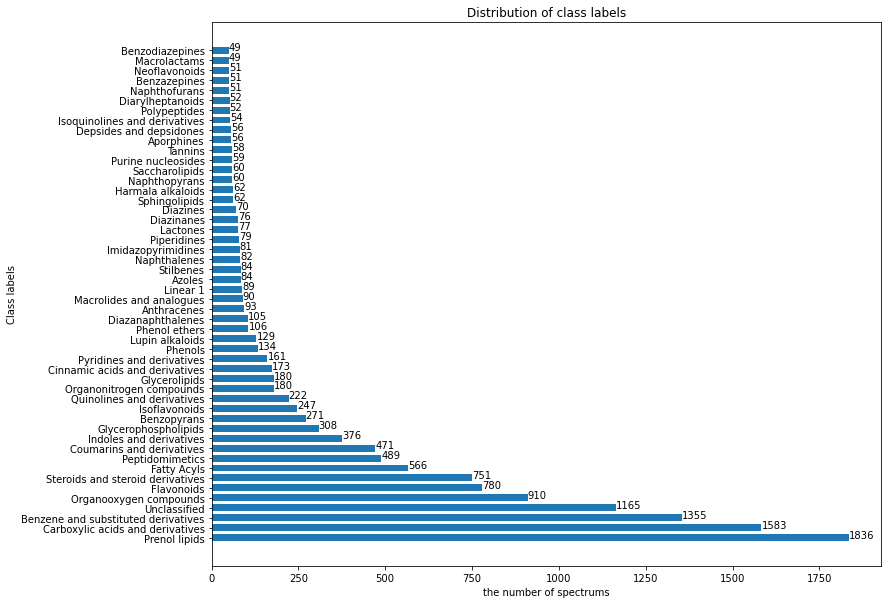

In [11]:
## Plot
data=list(sorted_label_distri.values())[:50]
data_lbs = list(sorted_label_distri.keys())[:50]

plt.figure(figsize=(12,10))

plt.barh(range(len(data)), data, height=0.7) # range(len(label_distri))
plt.ylabel('Class labels')
plt.xlabel('the number of spectrums')
plt.title('Distribution of class labels')
plt.yticks(range(len(data)), data_lbs)
for i in range(len(data)):
  plt.text(data[i]+0.1,i,"%s"%data[i])

# plt.savefig('/mnt/scratch/ding013/MS2ChemClass/classlabel_distr/all_label_distri_50.png', dpi=600)
plt.show()

## Summary plot

In [13]:
# Get all values of distribution
num_labels = list(sorted_label_distri.values())
len(num_labels)

# Define ranges
num_range = np.linspace(0,300,6, endpoint=False, dtype=int)
print(num_range)

# Summary the distribution
sum_dict={}
for i in range(len(num_range)):
    if i != len(num_range)-1:        
        count_num=0
        for j in num_labels:
            if j in range(num_range[i],num_range[i+1]):
                count_num+=1
        sum_dict['%s to %s'%(num_range[i],num_range[i+1])]=count_num
    else:
        count_num=0
        for j in num_labels:
            if j >= num_range[-1]:
                count_num+=1
        sum_dict['%s to'%num_range[i]]=count_num
print(sum_dict)
        
    

[  0  50 100 150 200 250]
{'0 to 50': 230, '50 to 100': 25, '100 to 150': 4, '150 to 200': 4, '200 to 250': 2, '250 to': 13}


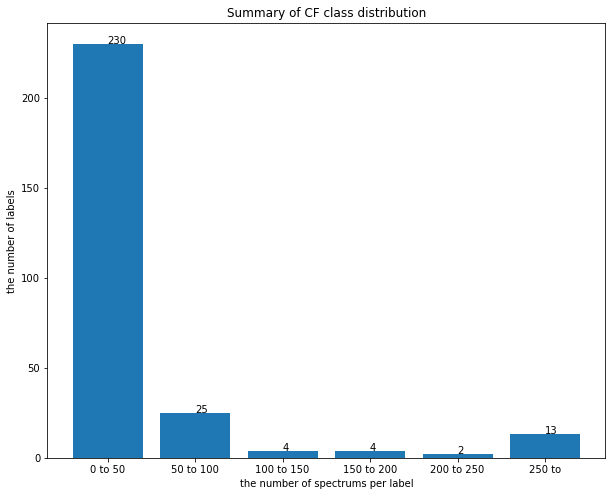

In [15]:
# Plot the summary of distribution
data = list(sum_dict.values())
data_name = list(sum_dict.keys())

plt.figure(figsize=(10,8))
plt.bar(range(len(data)), data)
plt.xlabel('the number of spectrums per label')
plt.ylabel('the number of labels')
plt.title('Summary of CF class distribution')
plt.xticks(range(len(data)), data_name)
for i in range(len(data)):
  plt.text(i,data[i]+0.1,"%s"%data[i])

# plt.savefig('/mnt/scratch/ding013/MS2ChemClass/classlabel_distr/distri_summary.png')
plt.show()